This demonstrates all the steps in my candidate selection before conducting visual inspection

In [1]:
import numpy as np
import splat
import wisps.data_analysis as wispd
from wisps.data_analysis import selection_criteria as sel_crt
import wispshapes
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import wisps

import matplotlib as mpl

#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.1
mpl.rcParams['figure.figsize'] = [6.0, 3.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.titlesize'] = 'large'

import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stars=wisps.Annotator.reformat_table(pd.read_hdf(wisps.COMBINED_PHOTO_SPECTRO_FILE, key='stars'))

In [3]:
np.isnan(stars.f_test.values).any()

True

In [4]:
#stars=wisps.datasets['rf_classified']

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


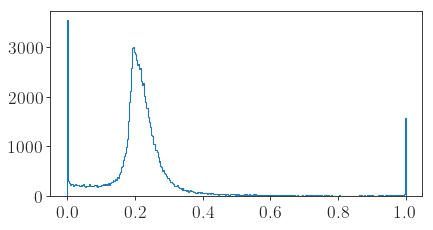

In [5]:
fig, ax=plt.subplots()
h=ax.hist(stars.f_test.dropna().values, bins='auto', histtype='step')

In [6]:
dt=stars[(stars.f_test>0.5) & (stars.snr1>=3.)].reset_index(drop=True)

In [7]:
len(dt), len(stars)

(1154, 110506)

In [8]:
gbhio=sel_crt.save_criteria(conts=dt)

  0%|          | 0/45 [00:00<?, ?it/s]

(2671, 26) (27, 26)


100%|██████████| 45/45 [01:46<00:00,  2.36s/it]


In [9]:
crts=sel_crt.crts_from_file()

In [10]:
#crts

In [11]:
#for idx in crts.values(): idx.plot(save=True)

In [12]:
compl=pd.DataFrame([x.completeness for x in crts.values()], index=[x.name for x in crts.values()])
cont=pd.DataFrame([x.contamination for x in crts.values()], index=[x.name for x in crts.values()])

In [13]:
def return_best_index(spt_range):
    return cont[cont[spt_range]<=cont[spt_range].min()+0.002][spt_range]

In [14]:
for x in cont.columns:
    print (return_best_index(x), " \n")

H_2O-1/J-Cont CH_4/J-Cont    0.066724
Name: L0-L5, dtype: float64  

H_2O-1/J-Cont CH_4/H-Cont    0.152513
Name: L5-T0, dtype: float64  

H_2O-1/J-Cont CH_4/J-Cont    0.144714
H_2O-1/J-Cont CH_4/H_2O-2    0.144714
Name: M7-L0, dtype: float64  

H_2O-2/H_2O-1 H-cont/J-Cont    0.285962
Name: T0-T5, dtype: float64  

H_2O-1/J-Cont H_2O-2/J-Cont    0.006932
H_2O-1/J-Cont CH_4/J-Cont      0.006066
H_2O-1/J-Cont CH_4/H-Cont      0.006932
Name: T5-T9, dtype: float64  

H_2O-1/J-Cont H_2O-2/H_2O-1    0.001733
H_2O-1/J-Cont H_2O-2/J-Cont    0.000867
H_2O-1/J-Cont CH_4/J-Cont      0.001733
H_2O-1/J-Cont CH_4/H-Cont      0.000867
Name: Y dwarfs, dtype: float64  

H-cont/J-Cont CH_4/J-Cont    0.033795
H-cont/J-Cont CH_4/H-Cont    0.033795
Name: subdwarfs, dtype: float64  

H-cont/H_2O-1 CH_4/J-Cont    0.145581
Name: trash, dtype: float64  



In [15]:
to_use={'H_2O-2/J-Cont H-cont/J-Cont':['L0-L5'],
        'H_2O-1/J-Cont H-cont/J-Cont':['L5-T0'],
        'H_2O-1/J-Cont H-cont/H_2O-2':['M7-L0'],
        'CH_4/J-Cont CH_4/H-Cont':['T0-T5'],
        #'H_2O-1/J-Cont CH_4/H_2O-1':['Y dwarfs'],
        'H_2O-1/J-Cont CH_4/H-Cont':['T5-T9'],
        'H-cont/J-Cont CH_4/J-Cont':['subdwarfs']}
#index_plot_CH_4_J_Cont_CH_4_H_Cont.pdf
        

In [16]:
good_indices=[crts[k] for k in to_use.keys()]

In [17]:
good_indices

[index-index space of H_2O-2/J-Cont H-cont/J-Cont,
 index-index space of H_2O-1/J-Cont H-cont/J-Cont,
 index-index space of H_2O-1/J-Cont H-cont/H_2O-2,
 index-index space of CH_4/J-Cont CH_4/H-Cont,
 index-index space of H_2O-1/J-Cont CH_4/H-Cont,
 index-index space of H-cont/J-Cont CH_4/J-Cont]

In [18]:
def box_parameters(idx, spt_range):
    bs=idx.shapes
    b=[x for x in bs if x.shape_name==spt_range][0]
    print ('{}  {} m: {} b: {} s:{}, comp : {}, cont: {}'.format(spt_range, idx,  round(b.coeffs[0], 2), round(b.coeffs[1], 2), round(b.scatter, 2), round(idx.completeness[spt_range], 2),  round(idx.contamination[spt_range], 3)))

In [19]:
#for idx, k in zip(good_indices, to_use.keys()):
#    spt_range=to_use[k][0]
#    box_parameters(idx, spt_range)

In [20]:
good_indices[0]

index-index space of H_2O-2/J-Cont H-cont/J-Cont

In [21]:
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 'small'


In [22]:
#idx=good_indices[0]

In [23]:
#idx.contaminants[[idx.ykey, idx.ykey]].applymap(float).round(2)

In [24]:
spex_df=wisps.Annotator.reformat_table(wisps.datasets['spex']).reset_index(drop=True)
manj=wisps.Annotator.reformat_table(wisps.datasets['manjavacas']).reset_index(drop=True)
schn=wisps.Annotator.reformat_table(wisps.datasets['schneider']).reset_index(drop=True)

In [25]:
subdwarfs=wisps.Annotator.reformat_table(good_indices[0]._subdwarfs).reset_index(drop=True)

In [26]:
good_indices[0].shapes

[box, box, box, box, box, box, box, box]

In [27]:
grped=wisps.Annotator.group_by_spt(spex_df, spt_label='Spts', subdwarfs=subdwarfs)

In [28]:
grped[grped['data_type']=='subdwarfs']

,CH_4/H-Cont,CH_4/H_2O-1,CH_4/H_2O-2,CH_4/J-Cont,H-cont/H_2O-1,H-cont/H_2O-2,H-cont/J-Cont,H_2O-1/J-Cont,H_2O-2/H_2O-1,H_2O-2/J-Cont,...,snr4,grism_id,j_2mass,h_2mass,metallicity_cls,gravity_cls,Spts,Names,spt_range,data_type


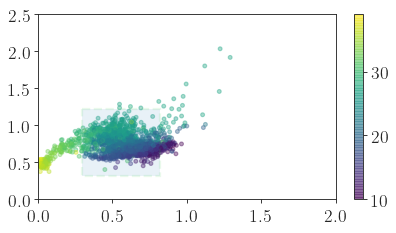

In [29]:
#fig, ax=plt.subplots(ncols=3, nrows=2, figsize=(12*1.5, 8*1.5))
fig, ax=plt.subplots()
bs=good_indices[0].shapes
bx=[x for x in bs if x.shape_name==to_use[good_indices[0].name][0]][0]
cb=ax.scatter(spex_df[good_indices[0].xkey],spex_df[good_indices[0].ykey], c=spex_df.Spts, s=12, cmap='viridis', alpha=.4 )

bx.plot(ax=ax)
ax.set_xlim([0.0, 2.])
ax.set_ylim([0., 2.5])
plt.colorbar(cb)
#ax=ax[0][0], xlim=[0.0, 2.], ylim=[0, 2.5])

In [30]:
#(good_indices[0].contaminants['H_2O-2/J-Cont']).apply(float).round(2)

L0-L5
L5-T0
M7-L0
T0-T5
T5-T9
subdwarfs


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


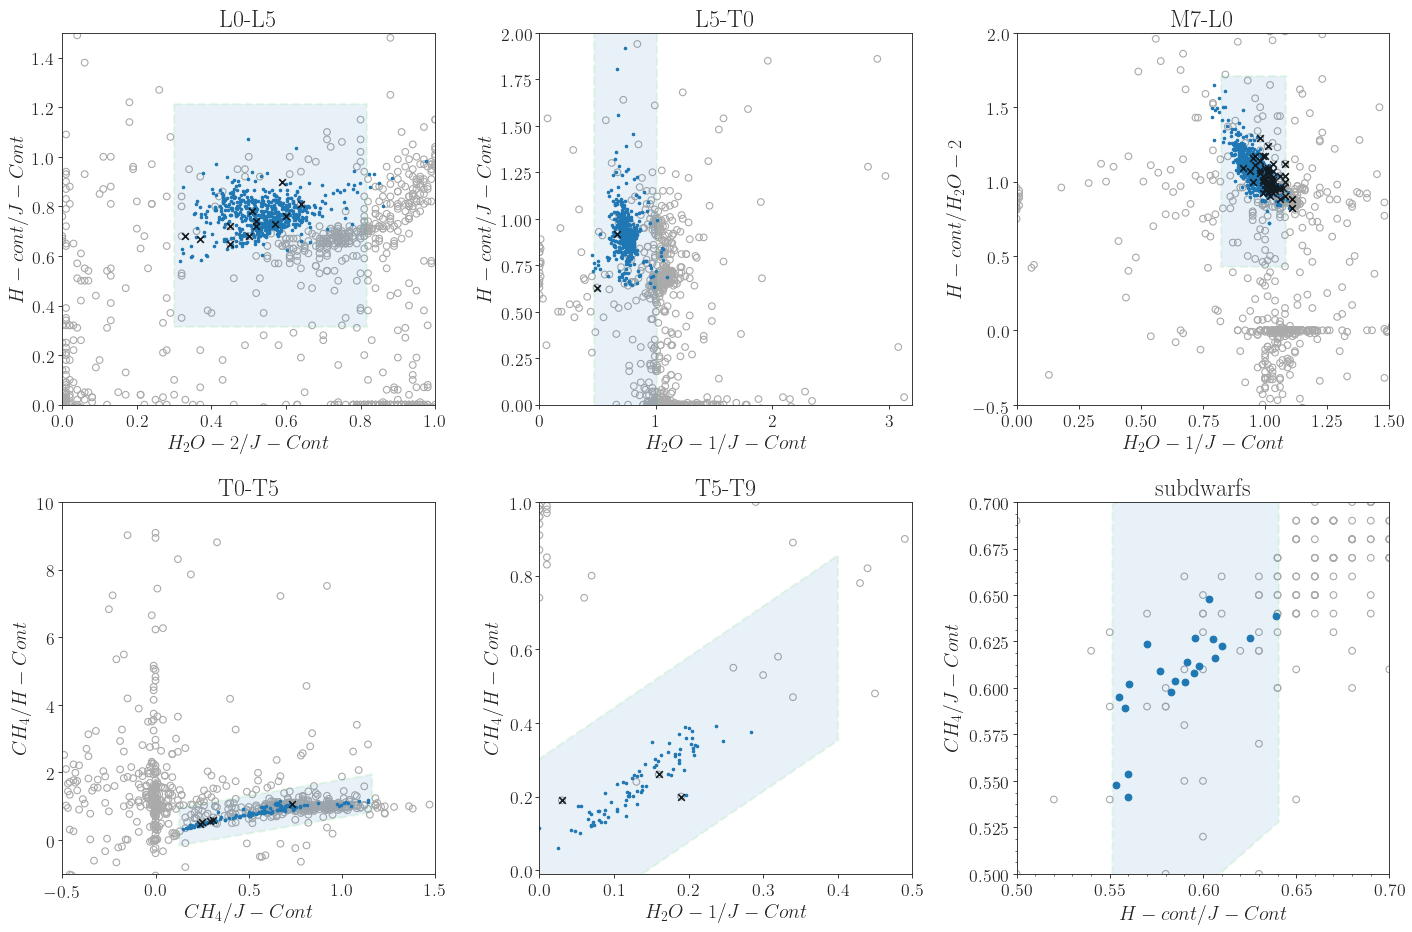

In [31]:
fig, ax=plt.subplots(ncols=3, nrows=2, figsize=(12*1.5, 8*1.5))

good_indices[0].new_plot_best(to_use[good_indices[0].name][0],ax=ax[0][0], xlim=[0.0, 1.], ylim=[0, 1.5])
good_indices[1].new_plot_best(to_use[good_indices[1].name][0],ax=ax[0][1],  xlim=[0.0, 3.2], ylim=[0.0, 2.])
good_indices[2].new_plot_best(to_use[good_indices[2].name][0],ax=ax[0][2], xlim=[0.0,1.5], ylim=[-.5, 2.])


good_indices[3].new_plot_best(to_use[good_indices[3].name][0], ax=ax[1][0], xlim=[-.5, 1.5], ylim=[-1., 10.])
good_indices[4].new_plot_best(to_use[good_indices[4].name][0],ax=ax[1][1],  xlim=[.0, 0.5], ylim=[-.01, 1.0])
good_indices[5].new_plot_best(to_use[good_indices[5].name][0], ax=ax[1][2],  xlim=[0.5, .7], ylim=[0.5, 0.7])


ax[0][0].set_title(to_use[good_indices[0].name][0])
ax[0][1].set_title(to_use[good_indices[1].name][0])
ax[0][2].set_title(to_use[good_indices[2].name][0])

ax[1][0].set_title(to_use[good_indices[3].name][0])
ax[1][1].set_title(to_use[good_indices[4].name][0])
ax[1][2].set_title(to_use[good_indices[5].name][0])

#for a in np.concatenate(ax)[1:]:
#  a.legend().set_visible(False)

plt.minorticks_on()
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/index_index_plots.pdf', bbox_inches='tight', dpi=200)

### Use these good indices to select objects, ignore f-test

In [32]:
dft=dt.rename(columns={'grism_id':'Names'})

In [33]:
import itertools

In [34]:
cands=[]
for idx, k in zip(good_indices, to_use.keys()):
    spt_range=to_use[k][0]
    print (spt_range)
    bs=idx.shapes
    bx=[x for x in bs if x.shape_name==spt_range][0]
    df_to_use=wisps.Annotator.reformat_table(dft[[idx.xkey, idx.ykey]])
    selec_indx_array=bx.select(df_to_use).index
    ls=dft.iloc[selec_indx_array].Names
    print (len(np.unique(ls))/len(dft))
    cands.append(ls)

L0-L5
0.1923743500866551
L5-T0
0.18977469670710573
M7-L0
0.15771230502599654
T0-T5
0.3630849220103986
T5-T9
0.006932409012131715
subdwarfs
0.033795493934142114


In [35]:
to_use

{'H_2O-2/J-Cont H-cont/J-Cont': ['L0-L5'],
 'H_2O-1/J-Cont H-cont/J-Cont': ['L5-T0'],
 'H_2O-1/J-Cont H-cont/H_2O-2': ['M7-L0'],
 'CH_4/J-Cont CH_4/H-Cont': ['T0-T5'],
 'H_2O-1/J-Cont CH_4/H-Cont': ['T5-T9'],
 'H-cont/J-Cont CH_4/J-Cont': ['subdwarfs']}

In [36]:
#subdwarfs
spt_range='subdwarfs'
idx=[idx for idx in good_indices if idx.name== 'H-cont/J-Cont CH_4/J-Cont' ][0]
print( idx)
bs=idx.shapes
bx=[x for x in bs if x.shape_name==spt_range][0]
f_to_use=wisps.Annotator.reformat_table(dft[[idx.xkey, idx.ykey]])
selec_indx_array=bx.select(df_to_use).index
ls=dft.iloc[selec_indx_array].Names

index-index space of H-cont/J-Cont CH_4/J-Cont


In [37]:
ls.values

array(['par457-00016', 'par248-00079', 'par98-00038', 'par44-00157',
       'par155-00040', 'par128-00034', 'par290-00009', 'par166-00044',
       'par191-00077', 'par371-00045', 'par349-00008', 'par249-00062',
       'par35-00023', 'par361-00005', 'par458-00004', 'par192-00026',
       'par139-00010', 'par391-00011', 'cosmos-23-G141_10153',
       'cosmos-10-G141_15968', 'aegis-05-G141_24702', 'uds-15-G141_15337',
       'uds-12-G141_13449', 'uds-12-G141_11439', 'uds-18-G141_31883',
       'uds-22-G141_14290', 'uds-21-G141_14877', 'goodsn-16-G141_33587',
       'goodsn-34-G141_14395', 'goodsn-43-G141_05338',
       'goodsn-43-G141_05553', 'goodss-10-G141_11987',
       'goodss-22-G141_03465', 'goodss-22-G141_03080',
       'goodsn-36-G141_20105', 'goodss-06-G141_10354',
       'goodsn-45-G141_14687', 'goodsn-13-G141_19794',
       'goodsn-13-G141_20147'], dtype=object)

In [38]:
merged = np.array(list(itertools.chain(*cands)))

In [39]:
final_cands=np.unique(merged.flatten())

In [40]:
dt[dt.grism_id.isin(np.unique(np.append(final_cands, ls)))].to_pickle(wisps.OUTPUT_FILES+'/selected_by_indices.pkl')

In [41]:
len(dt[dt.grism_id.isin(final_cands)])

573

In [42]:
import seaborn as sns 
cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


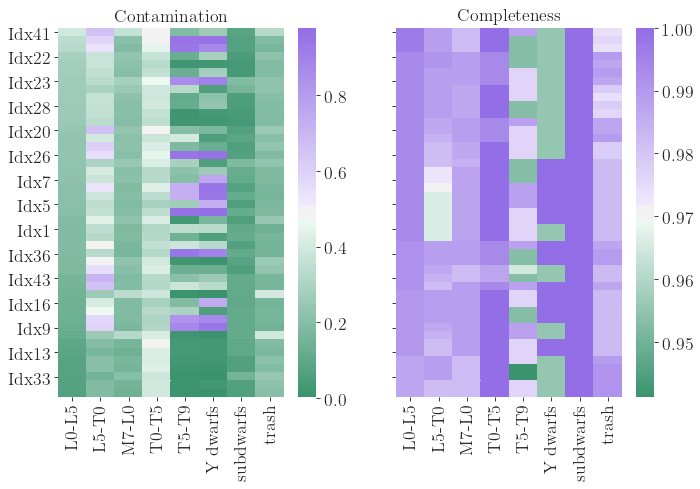

In [43]:
sel_crt.plot_cont_compl(cmap=cmap)

In [44]:
crt_vals=crts.values()
conts=pd.DataFrame([ x.contamination for x in crt_vals]).applymap( lambda x: round(x, 2))
compls=pd.DataFrame([ x.completeness for x in crt_vals]).applymap(lambda x: round(x, 2))
conts['index-space']=[x.name for x in crt_vals]
compls['index-space']=[x.name for x in crt_vals]

In [45]:
conts.to_latex(wisps.LIBRARIES+'/completeness.tex', index=False, na_rep=' ')
conts.to_latex(wisps.LIBRARIES+'/contamination.tex', index=False, na_rep=' ')

In [46]:
#save the indices used here

In [47]:
import pickle
#save the random forest
output_file=wisps.OUTPUT_FILES+'/best_indices_to_use.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(to_use,file)

In [48]:
df=wisps.datasets['candidates']

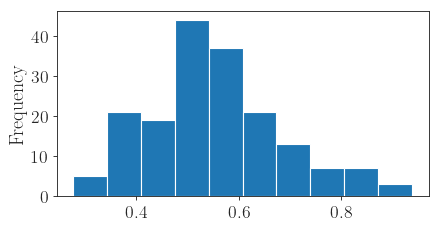

In [49]:
df.f_test.plot(kind='hist')

In [59]:
s=wisps.Source(name='par457-00016')

In [63]:
from astropy.io import ascii

In [66]:
0.035 *10000

350.00000000000006